In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

# Old function division benchmark

## Workers and Threads

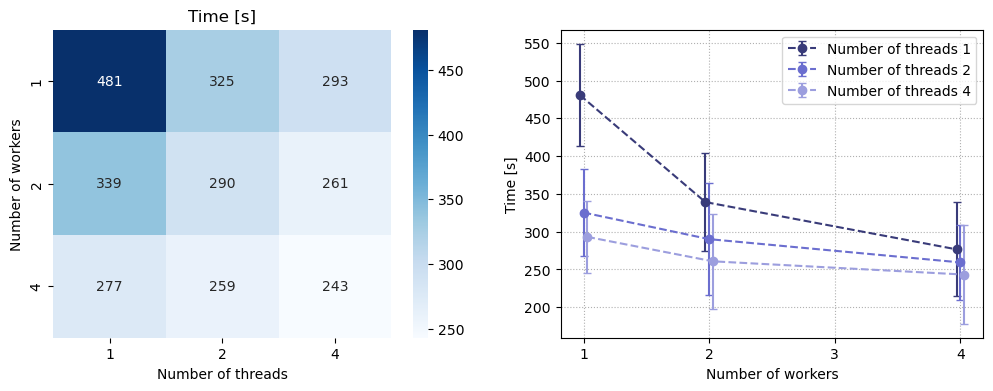

In [ ]:
tab20=mpl.colormaps['tab20b']
colors=tab20(range(9))

attempt = 5
workers_list = [1, 2, 4]
threads_list = [1, 2, 4]
array = np.load('Bench_files/Benchmark_Workers_Threads.npy')

mean = np.mean(array, axis=0)
std = np.std(array, axis=0)

df_cm = pd.DataFrame(mean, index = [str(w) for w in workers_list],
                  columns = [str(t) for t in threads_list])

#plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(df_cm, annot=True, ax=ax1, cmap='Blues',fmt='.0f')
ax1.set_xlabel('Number of threads')
ax1.set_ylabel('Number of workers')
ax1.set_title('Time [s]')

for k, t in enumerate(threads_list):
    if k == 0:
        ax2.errorbar(np.array(workers_list), mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[0])
    elif k == 1:
        ax2.errorbar(np.array(workers_list)+0.03, mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[2])
    else:
        ax2.errorbar(np.array(workers_list)+0.06, mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[3])
    
ax2.grid(linestyle='dotted')
ax2.set_ylabel('Time [s]')
ax2.set_xlabel('Number of workers')
ax2.set_xticks([i+1+0.03 for i in range(4)], labels=[i+1 for i in range(4)])
ax2.legend()
plt.savefig('Figures/bk_w_thr_old.png', dpi=1200)

## Partitions

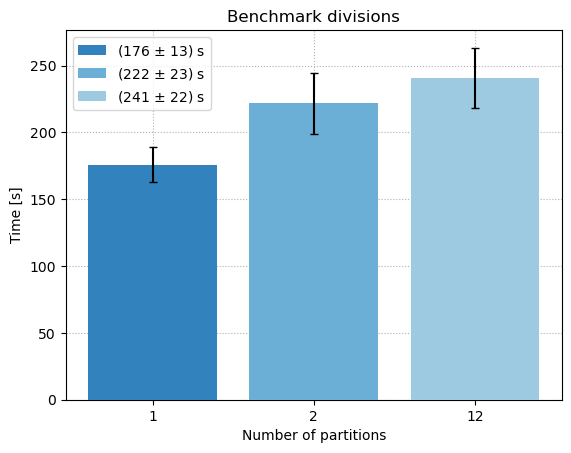

In [ ]:
tab20=mpl.colormaps['tab20c']
colors=tab20(range(9))

workers_list = [4]
threads_list = [4]
partitions_list = [1, 2, 12] #to be change in the plot in [1,12,24]
array = np.load('Bench_files/Benchmark_divisions.npy')

mean = np.mean(array, axis = 0)
std = np.std(array, axis = 0)

array = array.reshape((5, 3))
df = pd.DataFrame(array, columns=['d_1', 'd_2', 'd_12'])
# print(df.mean(axis=0))
# print(df.std(axis=0))

labels = [fr'({mean:.0f} $\pm$ {std:.0f}) s' for mean, std in zip(df.mean(axis=0).values, df.std(axis=0))]

fig,ax = plt.subplots()
ax.bar(x=['1', '2', '12'], height=df.mean(axis=0), yerr=df.std(axis=0), color =colors[0:3], label= labels, capsize = 3, zorder=4)
# ax.set_ylim(150, 265)
ax.set_xlabel('Number of partitions')
ax.set_ylabel('Time [s]')
ax.set_title('Benchmark divisions')
ax.legend(loc='upper left')
ax.grid(linestyle='dotted', zorder=-1)
plt.savefig('Figures/bk_divisions_old.png', dpi=1200)

## Directory

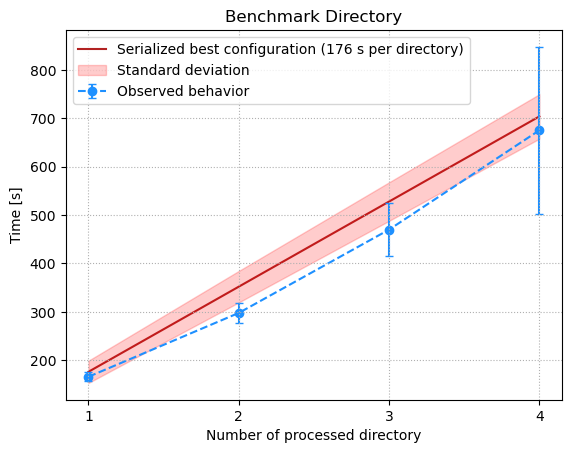

In [ ]:
workers_list = [4]
threads_list = [4]
number_directory_list = [1,2,3,4]

array_1 = np.load('Bench_files/Benchmark_directory.npy')
mean_1 = np.mean(array_1, axis = 0)
std_1 = np.std(array_1, axis = 0)

array_2 = np.load('Bench_files/Benchmark_4_directory.npy')
mean_2 = np.mean(array_2, axis = 0)
std_2 = np.std(array_2, axis = 0)

mean = np.concatenate((mean_1, mean_2), axis=3)
std = np.concatenate((std_1, std_2), axis=3)


fig, ax = plt.subplots()
ax.errorbar(x=number_directory_list,
            y=mean[0,0,0,1:],
            yerr=std[0,0,0,1:],
            fmt='o--',
            label='Observed behavior',
            capsize=3,
            zorder=1,
            color='dodgerblue')

ax.plot(number_directory_list,
        np.array(number_directory_list)*176,
        label='Serialized best configuration (176 s per directory)',
        color='firebrick',
        zorder=0)

plt.fill_between(x=number_directory_list,
                 y1 = np.array(number_directory_list)*176 +np.sqrt(number_directory_list)*23,
                 y2 = np.array(number_directory_list)*176 -np.sqrt(number_directory_list)*23,
                 alpha=0.2, color='red',
                 label='Standard deviation',
                 zorder=0)

ax.set_xlabel('Number of processed directory')
ax.set_ylabel('Time [s]')
ax.set_title('Benchmark Directory')
ax.set_xticks([i+1 for i in range(4)])
ax.grid(linestyle='dotted')
ax.legend(loc='upper left')

plt.savefig('Figures/bk_dir_old.png', dpi=1200)

# Old Function 10 attempt benchmark

## Workers and Threads

In [ ]:
tab20=mpl.colormaps['tab20b']
colors=tab20(range(9))

attempt = 5
workers_list = [1, 2, 4]
threads_list = [1, 2, 4]
array = np.load('Bench_files/Benchmark_Workers_Threads_10.npy')

mean = np.mean(array, axis=0)
std = np.std(array, axis=0)

df_cm = pd.DataFrame(mean, index = [str(w) for w in workers_list],
                  columns = [str(t) for t in threads_list])

#plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(df_cm, annot=True, ax=ax1, cmap='Blues',fmt='.0f')
ax1.set_xlabel('Number of threads')
ax1.set_ylabel('Number of workers')
ax1.set_title('Time [s]')

for k, t in enumerate(threads_list):
    if k == 0:
        ax2.errorbar(np.array(workers_list), mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[0])
    elif k == 1:
        ax2.errorbar(np.array(workers_list)+0.03, mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[2])
    else:
        ax2.errorbar(np.array(workers_list)+0.06, mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[3])
    
ax2.grid(linestyle='dotted')
ax2.set_ylabel('Time [s]')
ax2.set_xlabel('Number of workers')
ax2.set_xticks([i+1+0.03 for i in range(4)], labels=[i+1 for i in range(4)])
ax2.legend()
plt.savefig('Figures/bk_w_thr_old_10.png', dpi=1200)

## Partitions

In [ ]:
tab20=mpl.colormaps['tab20c']
colors=tab20(range(9))

workers_list = [4]
threads_list = [4]
partitions_list = [1, 2, 12] #to be change in the plot in [1,12,24]
array = np.load('Bench_files_10/Benchmark_divisions_10.npy')

mean = np.mean(array, axis = 0)
std = np.std(array, axis = 0)

array = array.reshape((5, 3))
df = pd.DataFrame(array, columns=['d_1', 'd_2', 'd_12'])
# print(df.mean(axis=0))
# print(df.std(axis=0))

labels = [fr'({mean:.0f} $\pm$ {std:.0f}) s' for mean, std in zip(df.mean(axis=0).values, df.std(axis=0))]

fig,ax = plt.subplots()
ax.bar(x=['1', '2', '12'], height=df.mean(axis=0), yerr=df.std(axis=0), color =colors[0:3], label= labels, capsize = 3, zorder=4)
# ax.set_ylim(150, 265)
ax.set_xlabel('Number of partitions')
ax.set_ylabel('Time [s]')
ax.set_title('Benchmark divisions')
ax.legend(loc='upper left')
ax.grid(linestyle='dotted', zorder=-1)
plt.savefig('Figures/bk_divisions_old_10.png', dpi=1200)

## Directory

In [ ]:
workers_list = [4]
threads_list = [2]
number_directory_list = [1,2,3,4]

array = np.load('Bench_files_10/Benchmark_directory_10.npy.npy')
mean = np.mean(array, axis=0).reshape(4)
std  = np.std(array, axis=0).reshape(4)

fig, ax = plt.subplots()
ax.errorbar(x=number_directory_list,
            y=mean,
            yerr=std,
            fmt='o--',
            label='Observed behavior',
            capsize=3,
            zorder=1,
            color='dodgerblue')

ax.plot(number_directory_list,
        np.array(number_directory_list)*213,
        label='Serialized best configuration (213 s per directory)',
        color='firebrick',
        zorder=0)

plt.fill_between(x=number_directory_list,
                 y1 = np.array(number_directory_list)*213 +np.sqrt(number_directory_list)*23,
                 y2 = np.array(number_directory_list)*213 -np.sqrt(number_directory_list)*23,
                 alpha=0.2, color='red',
                 label='Standard deviation',
                 zorder=0)

ax.set_xlabel('Number of processed directory')
ax.set_ylabel('Time [s]')
ax.set_title('Benchmark Directory')
ax.set_xticks([i+1 for i in range(4)])
ax.grid(linestyle='dotted')
ax.legend(loc='upper left')

plt.savefig('Figures/bk_dir_old_bag_try_10.png', dpi=1200)

# Bag function benchmark

## Workers and Threads 

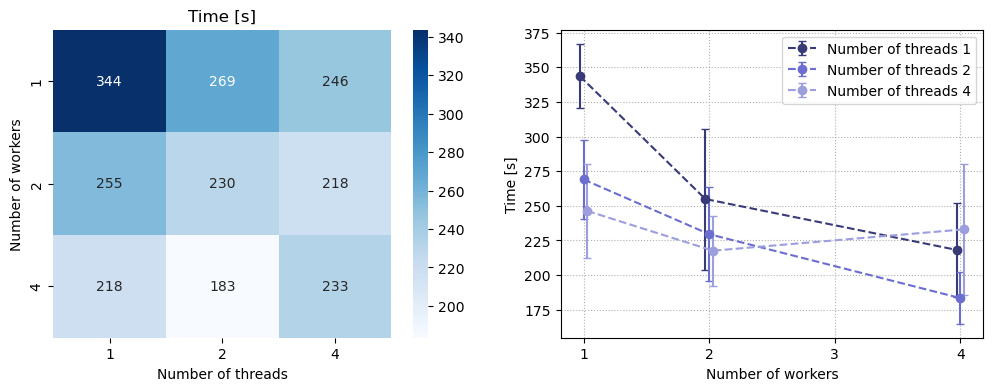

In [ ]:
tab20=mpl.colormaps['tab20b']
colors=tab20(range(9))

attempt = 5
workers_list = [1, 2, 4]
threads_list = [1, 2, 4]
array = np.load('Bench_files/Benchmark_Workers_Threads_bag_try.npy')

mean = np.mean(array, axis=0)
std = np.std(array, axis=0)

df_cm = pd.DataFrame(mean, index = [str(w) for w in workers_list],
                  columns = [str(t) for t in threads_list])

#plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(df_cm, annot=True, ax=ax1, cmap='Blues',fmt='.0f')
ax1.set_xlabel('Number of threads')
ax1.set_ylabel('Number of workers')
ax1.set_title('Time [s]')

for k, t in enumerate(threads_list):
    if k == 0:
        ax2.errorbar(np.array(workers_list), mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[0])
    elif k == 1:
        ax2.errorbar(np.array(workers_list)+0.03, mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[2])
    else:
        ax2.errorbar(np.array(workers_list)+0.06, mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[3])
    
ax2.grid(linestyle='dotted')
ax2.set_ylabel('Time [s]')
ax2.set_xlabel('Number of workers')
ax2.set_xticks([i+1+0.03 for i in range(4)], labels=[i+1 for i in range(4)])
ax2.legend()
plt.savefig('Figures/bk_w_thr_old_bag_try.png', dpi=1200)

## Partitions

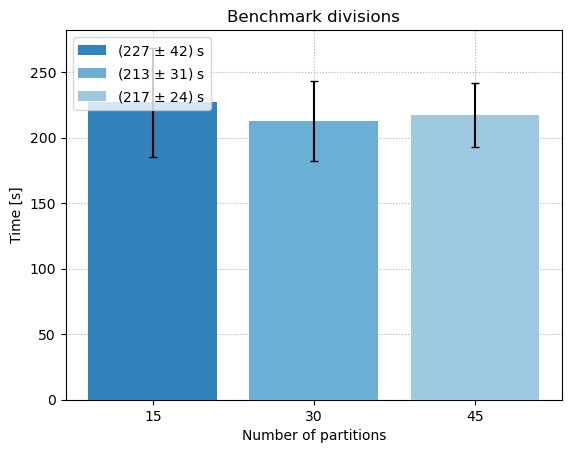

In [ ]:
tab20=mpl.colormaps['tab20c']
colors=tab20(range(9))

workers_list = [2]
threads_list = [2]
partitions_list = [15, 30, 45] #to be change in the plot in [1,12,24]
array = np.load('Bench_files/Benchmark_divisions_bag_try.npy')

mean = np.mean(array, axis = 0)
std = np.std(array, axis = 0)

array = array.reshape((5, 3))
df = pd.DataFrame(array, columns=['d_1', 'd_2', 'd_12'])
# print(df.mean(axis=0))
# print(df.std(axis=0))

labels = [fr'({mean:.0f} $\pm$ {std:.0f}) s' for mean, std in zip(df.mean(axis=0).values, df.std(axis=0))]

fig,ax = plt.subplots()
ax.bar(x=['15', '30', '45'], height=df.mean(axis=0), yerr=df.std(axis=0), color =colors[0:3], label= labels, capsize = 3, zorder=4)
# ax.set_ylim(150, 265)
ax.set_xlabel('Number of partitions')
ax.set_ylabel('Time [s]')
ax.set_title('Benchmark divisions')
ax.legend(loc='upper left')
ax.grid(linestyle='dotted', zorder=-1)
plt.savefig('Figures/bk_divisions_old_bag_try.png', dpi=1200)

## Directory

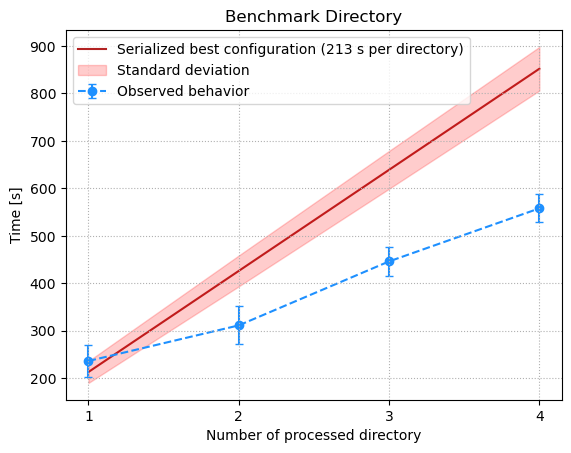

In [ ]:
workers_list = [4]
threads_list = [2]
number_directory_list = [1,2,3,4]

array = np.load('Benchmark_directory_bag_try.npy')
mean = np.mean(array, axis=0).reshape(4)
std  = np.std(array, axis=0).reshape(4)

fig, ax = plt.subplots()
ax.errorbar(x=number_directory_list,
            y=mean,
            yerr=std,
            fmt='o--',
            label='Observed behavior',
            capsize=3,
            zorder=1,
            color='dodgerblue')

ax.plot(number_directory_list,
        np.array(number_directory_list)*213,
        label='Serialized best configuration (213 s per directory)',
        color='firebrick',
        zorder=0)

plt.fill_between(x=number_directory_list,
                 y1 = np.array(number_directory_list)*213 +np.sqrt(number_directory_list)*23,
                 y2 = np.array(number_directory_list)*213 -np.sqrt(number_directory_list)*23,
                 alpha=0.2, color='red',
                 label='Standard deviation',
                 zorder=0)

ax.set_xlabel('Number of processed directory')
ax.set_ylabel('Time [s]')
ax.set_title('Benchmark Directory')
ax.set_xticks([i+1 for i in range(4)])
ax.grid(linestyle='dotted')
ax.legend(loc='upper left')

plt.savefig('Figures/bk_dir_old_bag_try.png', dpi=1200)

# Bag function 10 attempt benchmark

## Workers and Thread

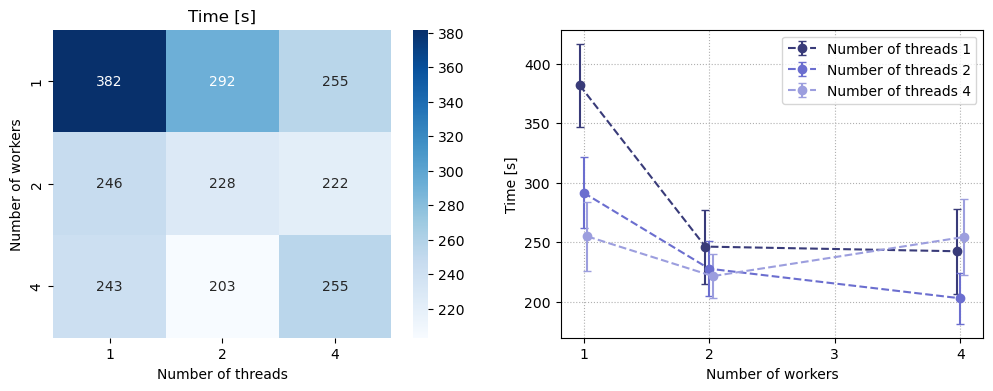

In [ ]:
tab20=mpl.colormaps['tab20b']
colors=tab20(range(9))

attempt = 10
workers_list = [1, 2, 4]
threads_list = [1, 2, 4]
array = np.load('Bench_files_10/Benchmark_Workers_Threads_bag_try_10.npy')

mean = np.mean(array, axis=0)
std = np.std(array, axis=0)

df_cm = pd.DataFrame(mean, index = [str(w) for w in workers_list],
                  columns = [str(t) for t in threads_list])

#plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(df_cm, annot=True, ax=ax1, cmap='Blues',fmt='.0f')
ax1.set_xlabel('Number of threads')
ax1.set_ylabel('Number of workers')
ax1.set_title('Time [s]')

for k, t in enumerate(threads_list):
    if k == 0:
        ax2.errorbar(np.array(workers_list), mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[0])
    elif k == 1:
        ax2.errorbar(np.array(workers_list)+0.03, mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[2])
    else:
        ax2.errorbar(np.array(workers_list)+0.06, mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[3])
    
ax2.grid(linestyle='dotted')
ax2.set_ylabel('Time [s]')
ax2.set_xlabel('Number of workers')
ax2.set_xticks([i+1+0.03 for i in range(4)], labels=[i+1 for i in range(4)])
ax2.legend()
plt.savefig('Figures/bk_w_thr_old_bag_try_10.png', dpi=1200)

## Partitions

In [ ]:
tab20=mpl.colormaps['tab20c']
colors=tab20(range(9))

workers_list = [2]
threads_list = [2]
partitions_list = [15, 30, 45] #to be change in the plot in [1,12,24]
array = np.load('Bench_files_10/Benchmark_divisions_bag_try_10.npy')

mean = np.mean(array, axis = 0)
std = np.std(array, axis = 0)

array = array.reshape((5, 3))
df = pd.DataFrame(array, columns=['d_1', 'd_2', 'd_12'])
# print(df.mean(axis=0))
# print(df.std(axis=0))

labels = [fr'({mean:.0f} $\pm$ {std:.0f}) s' for mean, std in zip(df.mean(axis=0).values, df.std(axis=0))]

fig,ax = plt.subplots()
ax.bar(x=['15', '30', '45'], height=df.mean(axis=0), yerr=df.std(axis=0), color =colors[0:3], label= labels, capsize = 3, zorder=4)
# ax.set_ylim(150, 265)
ax.set_xlabel('Number of partitions')
ax.set_ylabel('Time [s]')
ax.set_title('Benchmark divisions')
ax.legend(loc='upper left')
ax.grid(linestyle='dotted', zorder=-1)
plt.savefig('Figures/bk_divisions_old_bag_try_10.png', dpi=1200)

## Directory

In [ ]:
workers_list = [4]
threads_list = [2]
number_directory_list = [1,2,3,4]

array = np.load('Bench_files_10/Benchmark_directory_bag_try_10.npy')
mean = np.mean(array, axis=0).reshape(4)
std  = np.std(array, axis=0).reshape(4)

fig, ax = plt.subplots()
ax.errorbar(x=number_directory_list,
            y=mean,
            yerr=std,
            fmt='o--',
            label='Observed behavior',
            capsize=3,
            zorder=1,
            color='dodgerblue')

ax.plot(number_directory_list,
        np.array(number_directory_list)*213,
        label='Serialized best configuration (213 s per directory)',
        color='firebrick',
        zorder=0)

plt.fill_between(x=number_directory_list,
                 y1 = np.array(number_directory_list)*213 +np.sqrt(number_directory_list)*23,
                 y2 = np.array(number_directory_list)*213 -np.sqrt(number_directory_list)*23,
                 alpha=0.2, color='red',
                 label='Standard deviation',
                 zorder=0)

ax.set_xlabel('Number of processed directory')
ax.set_ylabel('Time [s]')
ax.set_title('Benchmark Directory')
ax.set_xticks([i+1 for i in range(4)])
ax.grid(linestyle='dotted')
ax.legend(loc='upper left')

plt.savefig('Figures/bk_dir_old_bag_try_10.png', dpi=1200)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

# Old function division benchmark

## Workers and Threads

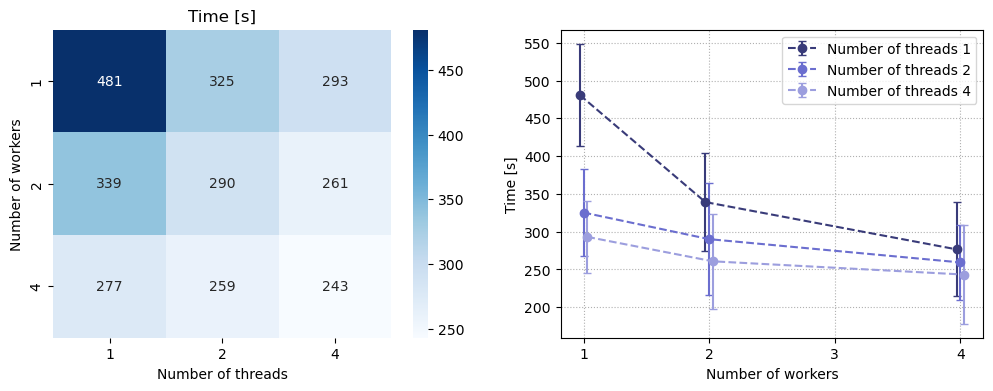

In [ ]:
tab20=mpl.colormaps['tab20b']
colors=tab20(range(9))

attempt = 5
workers_list = [1, 2, 4]
threads_list = [1, 2, 4]
array = np.load('Bench_files/Benchmark_Workers_Threads.npy')

mean = np.mean(array, axis=0)
std = np.std(array, axis=0)

df_cm = pd.DataFrame(mean, index = [str(w) for w in workers_list],
                  columns = [str(t) for t in threads_list])

#plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(df_cm, annot=True, ax=ax1, cmap='Blues',fmt='.0f')
ax1.set_xlabel('Number of threads')
ax1.set_ylabel('Number of workers')
ax1.set_title('Time [s]')

for k, t in enumerate(threads_list):
    if k == 0:
        ax2.errorbar(np.array(workers_list), mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[0])
    elif k == 1:
        ax2.errorbar(np.array(workers_list)+0.03, mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[2])
    else:
        ax2.errorbar(np.array(workers_list)+0.06, mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[3])
    
ax2.grid(linestyle='dotted')
ax2.set_ylabel('Time [s]')
ax2.set_xlabel('Number of workers')
ax2.set_xticks([i+1+0.03 for i in range(4)], labels=[i+1 for i in range(4)])
ax2.legend()
plt.savefig('Figures/bk_w_thr_old.png', dpi=1200)

## Partitions

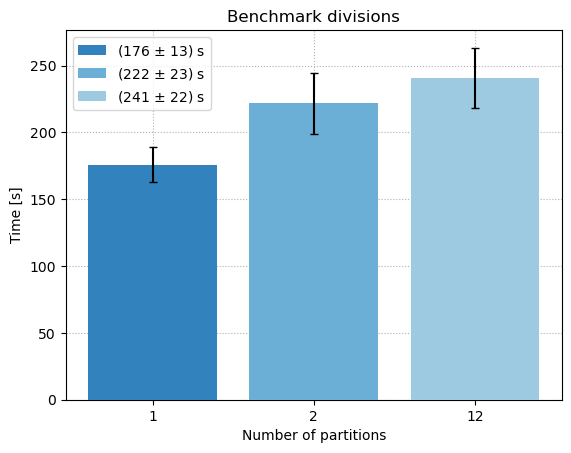

In [ ]:
tab20=mpl.colormaps['tab20c']
colors=tab20(range(9))

workers_list = [4]
threads_list = [4]
partitions_list = [1, 2, 12] #to be change in the plot in [1,12,24]
array = np.load('Bench_files/Benchmark_divisions.npy')

mean = np.mean(array, axis = 0)
std = np.std(array, axis = 0)

array = array.reshape((5, 3))
df = pd.DataFrame(array, columns=['d_1', 'd_2', 'd_12'])
# print(df.mean(axis=0))
# print(df.std(axis=0))

labels = [fr'({mean:.0f} $\pm$ {std:.0f}) s' for mean, std in zip(df.mean(axis=0).values, df.std(axis=0))]

fig,ax = plt.subplots()
ax.bar(x=['1', '2', '12'], height=df.mean(axis=0), yerr=df.std(axis=0), color =colors[0:3], label= labels, capsize = 3, zorder=4)
# ax.set_ylim(150, 265)
ax.set_xlabel('Number of partitions')
ax.set_ylabel('Time [s]')
ax.set_title('Benchmark divisions')
ax.legend(loc='upper left')
ax.grid(linestyle='dotted', zorder=-1)
plt.savefig('Figures/bk_divisions_old.png', dpi=1200)

## Directory

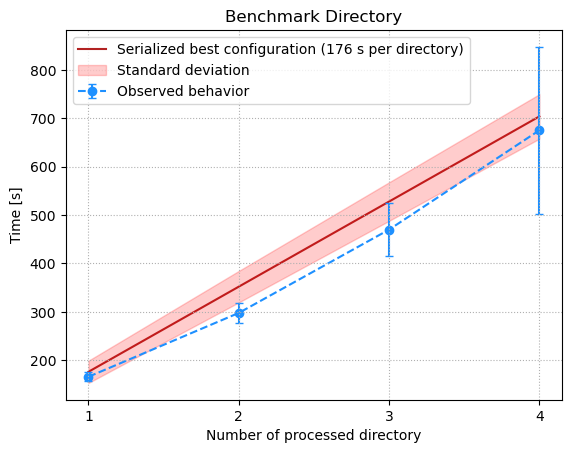

In [ ]:
workers_list = [4]
threads_list = [4]
number_directory_list = [1,2,3,4]

array_1 = np.load('Bench_files/Benchmark_directory.npy')
mean_1 = np.mean(array_1, axis = 0)
std_1 = np.std(array_1, axis = 0)

array_2 = np.load('Bench_files/Benchmark_4_directory.npy')
mean_2 = np.mean(array_2, axis = 0)
std_2 = np.std(array_2, axis = 0)

mean = np.concatenate((mean_1, mean_2), axis=3)
std = np.concatenate((std_1, std_2), axis=3)


fig, ax = plt.subplots()
ax.errorbar(x=number_directory_list,
            y=mean[0,0,0,1:],
            yerr=std[0,0,0,1:],
            fmt='o--',
            label='Observed behavior',
            capsize=3,
            zorder=1,
            color='dodgerblue')

ax.plot(number_directory_list,
        np.array(number_directory_list)*176,
        label='Serialized best configuration (176 s per directory)',
        color='firebrick',
        zorder=0)

plt.fill_between(x=number_directory_list,
                 y1 = np.array(number_directory_list)*176 +np.sqrt(number_directory_list)*23,
                 y2 = np.array(number_directory_list)*176 -np.sqrt(number_directory_list)*23,
                 alpha=0.2, color='red',
                 label='Standard deviation',
                 zorder=0)

ax.set_xlabel('Number of processed directory')
ax.set_ylabel('Time [s]')
ax.set_title('Benchmark Directory')
ax.set_xticks([i+1 for i in range(4)])
ax.grid(linestyle='dotted')
ax.legend(loc='upper left')

plt.savefig('Figures/bk_dir_old.png', dpi=1200)

# Bag function benchmark

## Workers and Threads 

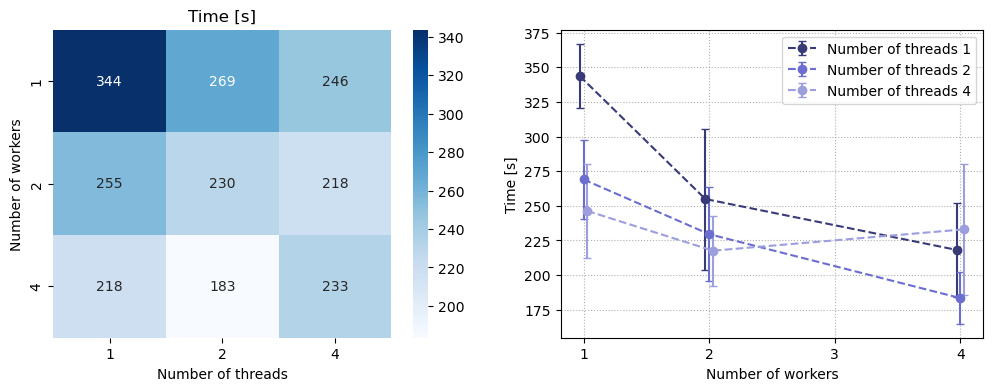

In [ ]:
tab20=mpl.colormaps['tab20b']
colors=tab20(range(9))

attempt = 5
workers_list = [1, 2, 4]
threads_list = [1, 2, 4]
array = np.load('Bench_files/Benchmark_Workers_Threads_bag_try.npy')

mean = np.mean(array, axis=0)
std = np.std(array, axis=0)

df_cm = pd.DataFrame(mean, index = [str(w) for w in workers_list],
                  columns = [str(t) for t in threads_list])

#plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(df_cm, annot=True, ax=ax1, cmap='Blues',fmt='.0f')
ax1.set_xlabel('Number of threads')
ax1.set_ylabel('Number of workers')
ax1.set_title('Time [s]')

for k, t in enumerate(threads_list):
    if k == 0:
        ax2.errorbar(np.array(workers_list), mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[0])
    elif k == 1:
        ax2.errorbar(np.array(workers_list)+0.03, mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[2])
    else:
        ax2.errorbar(np.array(workers_list)+0.06, mean[:, k], yerr=std[:, k], label=f'Number of threads {t}', fmt='o--', capsize=3, color=colors[3])
    
ax2.grid(linestyle='dotted')
ax2.set_ylabel('Time [s]')
ax2.set_xlabel('Number of workers')
ax2.set_xticks([i+1+0.03 for i in range(4)], labels=[i+1 for i in range(4)])
ax2.legend()
plt.savefig('Figures/bk_w_thr_old_bag_try.png', dpi=1200)

## Partitions

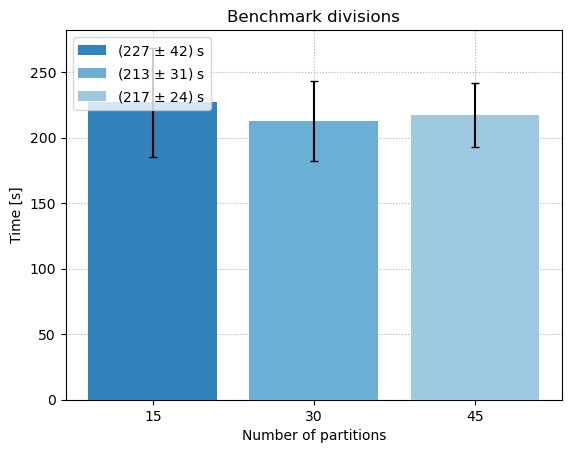

In [ ]:
tab20=mpl.colormaps['tab20c']
colors=tab20(range(9))

workers_list = [2]
threads_list = [2]
partitions_list = [15, 30, 45] #to be change in the plot in [1,12,24]
array = np.load('Bench_files/Benchmark_divisions_bag_try.npy')

mean = np.mean(array, axis = 0)
std = np.std(array, axis = 0)

array = array.reshape((5, 3))
df = pd.DataFrame(array, columns=['d_1', 'd_2', 'd_12'])
# print(df.mean(axis=0))
# print(df.std(axis=0))

labels = [fr'({mean:.0f} $\pm$ {std:.0f}) s' for mean, std in zip(df.mean(axis=0).values, df.std(axis=0))]

fig,ax = plt.subplots()
ax.bar(x=['15', '30', '45'], height=df.mean(axis=0), yerr=df.std(axis=0), color =colors[0:3], label= labels, capsize = 3, zorder=4)
# ax.set_ylim(150, 265)
ax.set_xlabel('Number of partitions')
ax.set_ylabel('Time [s]')
ax.set_title('Benchmark divisions')
ax.legend(loc='upper left')
ax.grid(linestyle='dotted', zorder=-1)
plt.savefig('Figures/bk_divisions_old_bag_try.png', dpi=1200)

## Directory

In [ ]:
std.ndim
std

array([[[[33.43705621, 40.18118736, 31.22345547, 29.32163607]]]])

In [ ]:
mean.ndim
mean.reshape(4)

array([236.17750144, 311.24729061, 446.03631535, 557.819133  ])

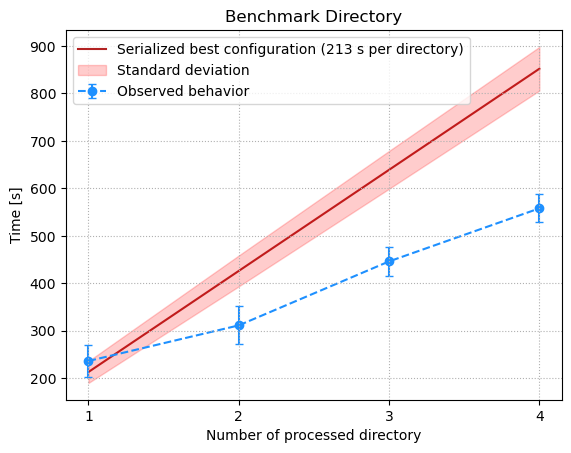

In [ ]:
workers_list = [4]
threads_list = [2]
number_directory_list = [1,2,3,4]

array = np.load('Benchmark_directory_bag_try.npy')
mean = np.mean(array, axis=0).reshape(4)
std  = np.std(array, axis=0).reshape(4)

fig, ax = plt.subplots()
ax.errorbar(x=number_directory_list,
            y=mean,
            yerr=std,
            fmt='o--',
            label='Observed behavior',
            capsize=3,
            zorder=1,
            color='dodgerblue')

ax.plot(number_directory_list,
        np.array(number_directory_list)*213,
        label='Serialized best configuration (213 s per directory)',
        color='firebrick',
        zorder=0)

plt.fill_between(x=number_directory_list,
                 y1 = np.array(number_directory_list)*213 +np.sqrt(number_directory_list)*23,
                 y2 = np.array(number_directory_list)*213 -np.sqrt(number_directory_list)*23,
                 alpha=0.2, color='red',
                 label='Standard deviation',
                 zorder=0)

ax.set_xlabel('Number of processed directory')
ax.set_ylabel('Time [s]')
ax.set_title('Benchmark Directory')
ax.set_xticks([i+1 for i in range(4)])
ax.grid(linestyle='dotted')
ax.legend(loc='upper left')

plt.savefig('Figures/bk_dir_old_bag_try.png', dpi=1200)

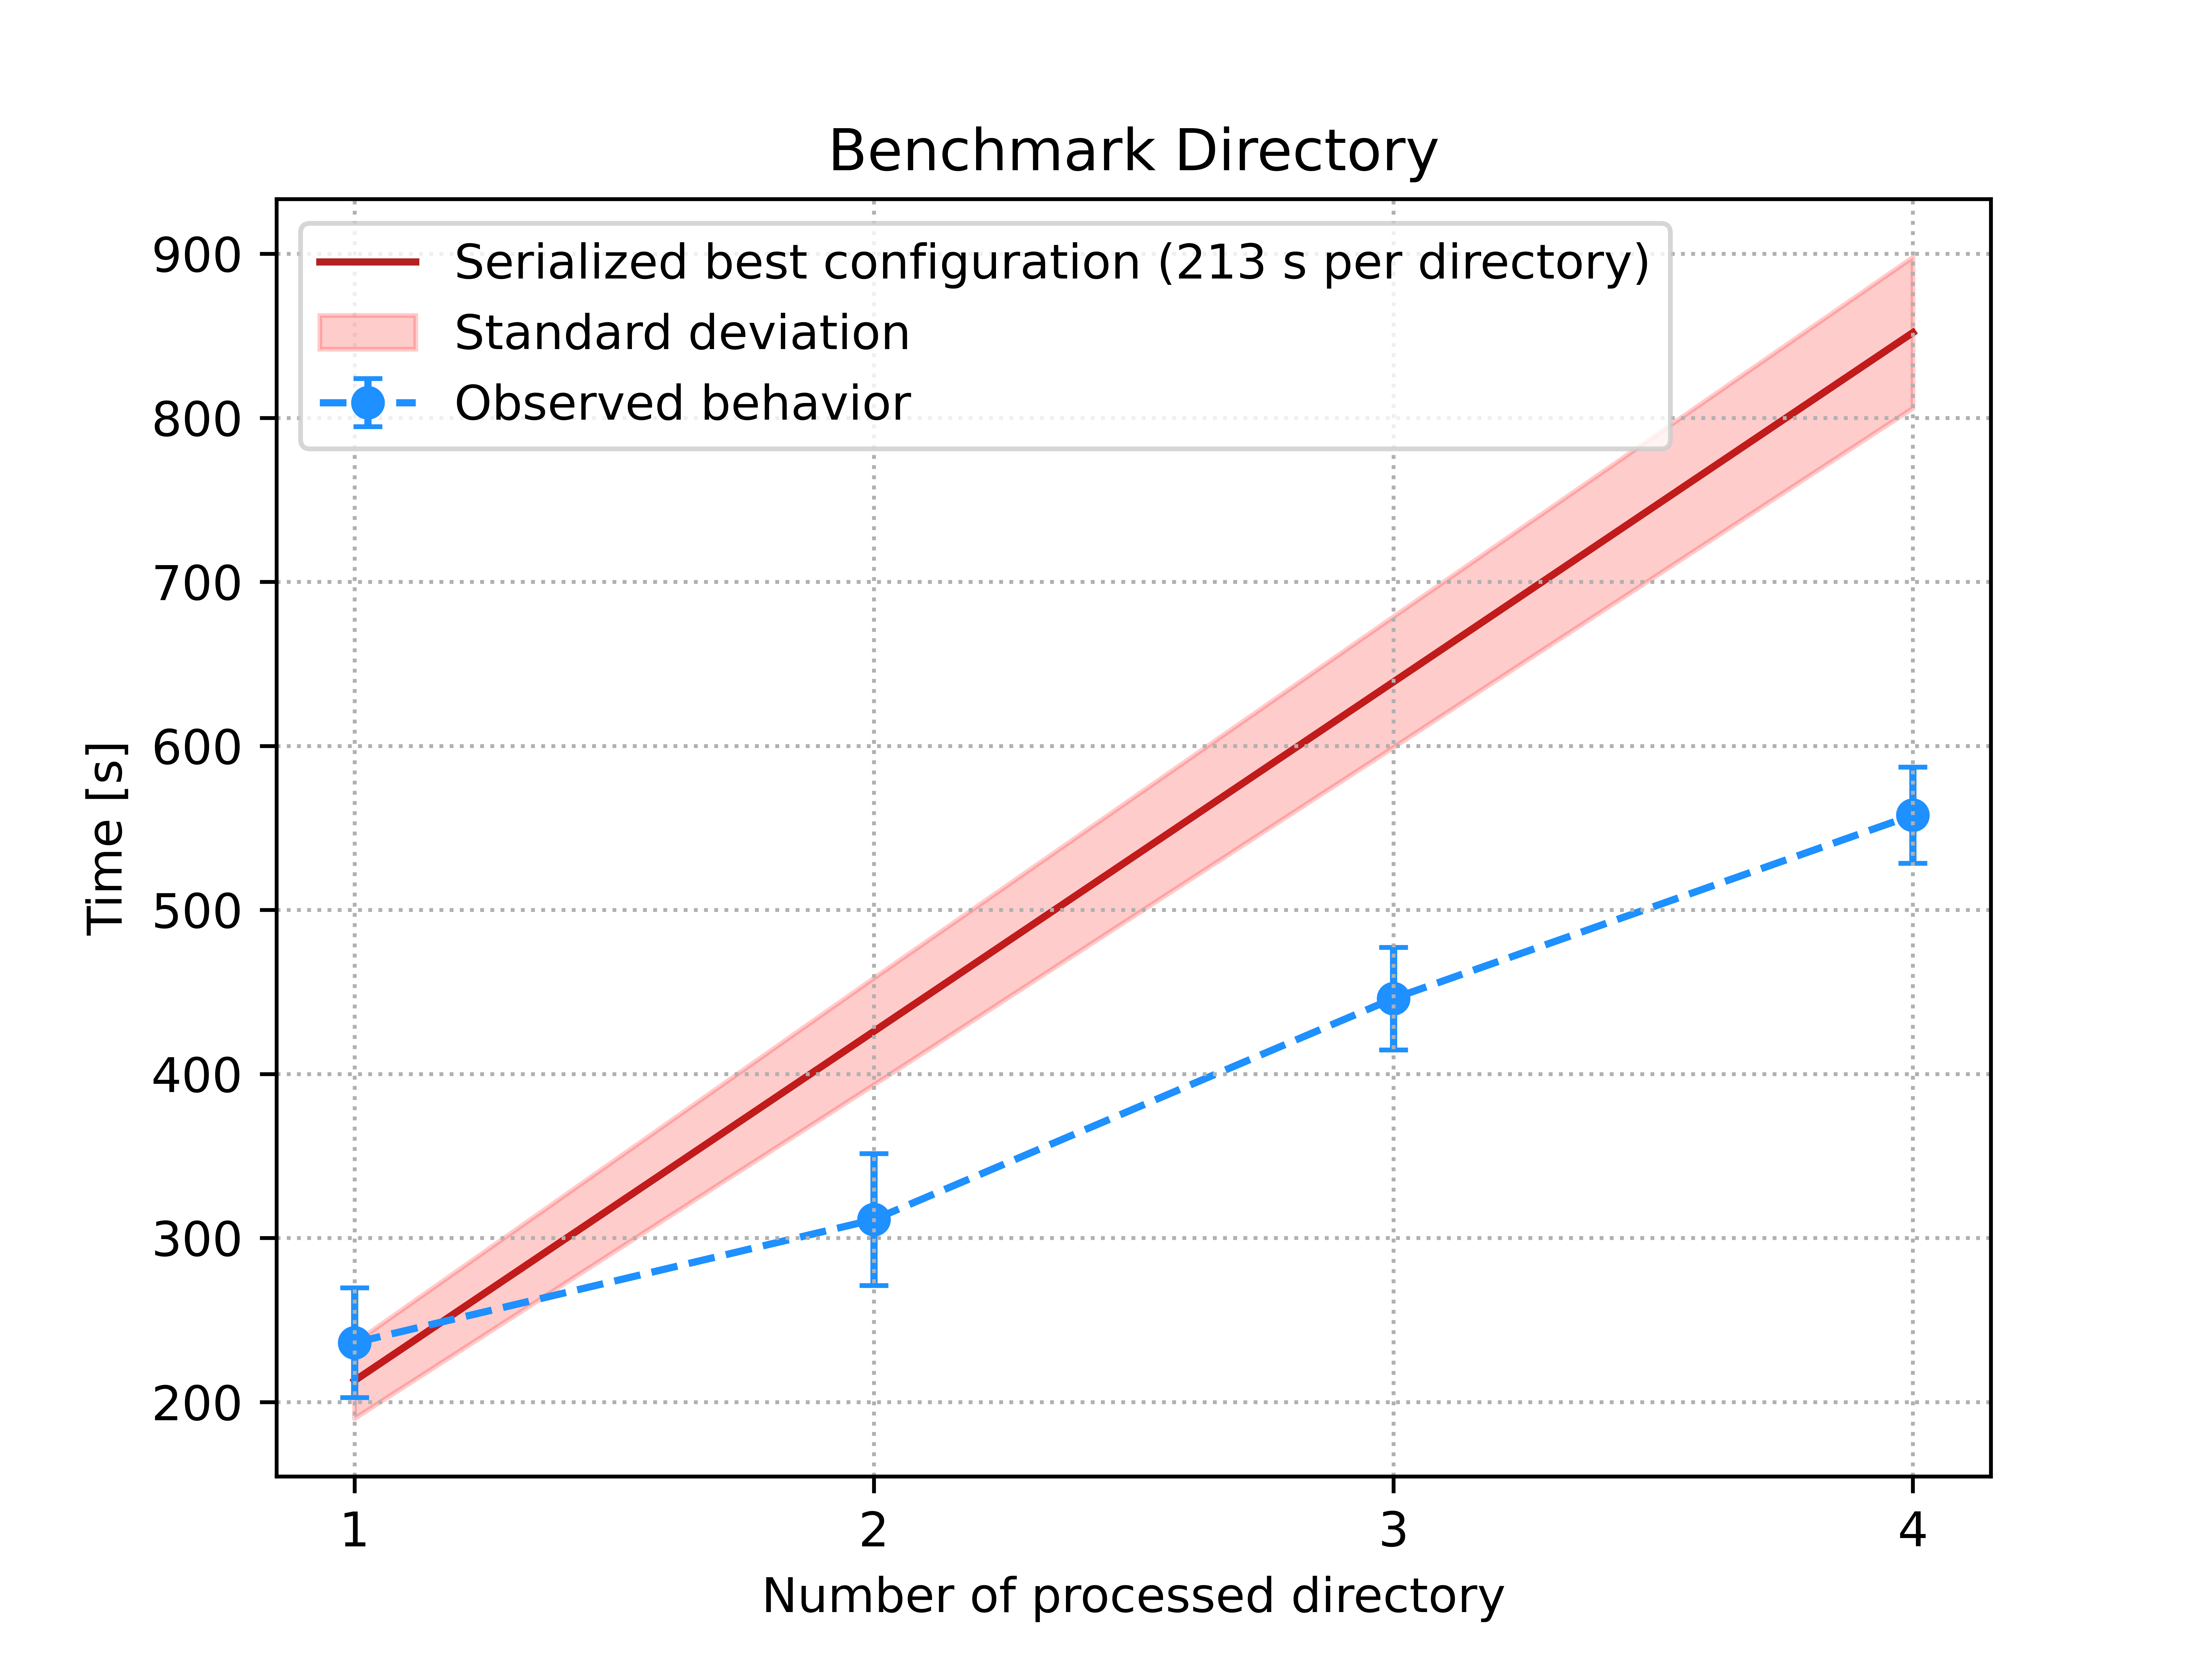

In [ ]:
from IPython import display
display.Image('Figures/bk_dir_old_bag_try.png', width=800)